In [2]:
import sympy as sp
from sympy import lambdify
import numpy as np
import matplotlib.pyplot as plt

class FEMBasis(object):
    """This is gonna be my class for all the basis functions"""
    def __init__(this, x, N):
        """Takes a sympy symbol and the 1-D Mesh size, higher dimensions can be created via Kronecker delta product"""
        if isinstance(x, sp.Symbol):
            h = sp.Rational(1, N-1)
        else:
            h = 1.0/(N-1)
        this.h = 1.0/(N-1)
        this.points = [i*h for i in range(N)]
        this.psi = [this.Lagrange_polynomial(x, i, this.points) for i in range(N)]
        this.lam_psi = [] ## convert all them sympy expressions into sweet organic lambdas
        for i in range(0,len(this.psi)):
            this.lam_psi.append(lambdify(x, this.psi[i], modules=['numpy']))
        this.lam_dpsi = [] ## again but the derivatives
        for i in range(0,len(this.psi)):
            this.lam_dpsi.append(lambdify(x, sp.diff(this.psi[i]), modules=['numpy']))


        
    def Lagrange_polynomial(this, x, i, points):
        """Makes the Lagrange polynomial specified"""
        p = 1
        for k in range(len(points)):
            if k != i:
                p *= (x - points[k])/(points[i] - points[k])
        return p
    
    def integrate(this,f,a,b,N):
        """integrates f using Chebyshev-Gauss Quadrature"""
        xi = np.cos(np.pi*(1-np.linspace(0,1,N+1))) ## [-1,1] Chebyshev points
        wi = np.pi/N*(1-xi**2)**0.5 ## weights
        xi = a+(b-a)*(xi+1.0)/2.0 ## mapping to interval [a,b]
        wi*=(b-a)/2.0 ## adjusting weights to reflect mapped domain
        return(sum(wi*f(xi)))

    def innerproduct(this,f,g,a,b,N):
        """inner product of two functions f & g"""
        return(this.integrate(lambda x: f(x)*g(x),a,b,N))
    
    ## Below here is wrong, but I am currently too dumb to understand the method fully
    def makeA(this):
        """integrate psi_i psi_j"""
        this.A = []    
        for i in range(0,len(this.lam_psi)):
            row = []
            for j in range (0,len(this.lam_psi)):
                row.append(this.innerproduct(this.lam_psi[i],this.lam_psi[j],0,1,100))
            this.A.append(row)
                        
    def makeU(this):
        """integrate psi_i dpsi_j"""
        this.K = []    
        for i in range(0,len(this.lam_psi)):
            row = []
            for j in range (0,len(this.lam_dpsi)):
                row.append(this.innerproduct(this.lam_psi[i],this.lam_dpsi[j],0,1,100))
            this.K.append(row)       
            
    def makeK(this):
        """integrate dpsi_i dpsi_j"""
        this.K = []    
        for i in range(0,len(this.lam_dpsi)):
            row = []
            for j in range (0,len(this.lam_dpsi)):
                row.append(this.innerproduct(this.lam_dpsi[i],this.lam_dpsi[j],0,1,100))
            this.K.append(row)
            
    def makeVecB(this, f):
        """integrate psi_i f for given f"""  
        this.vecB = []
        for i in range(0,len(this.lam_psi)):
            this.vecB.append(this.innerproduct(this.lam_psi[i],f,0,1,100))

In [3]:
x = sp.symbols('x')
myFEM = FEMBasis(x,2)

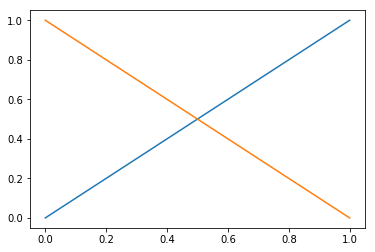

In [14]:
x_i = np.linspace(0,1,100)
plt.plot(x_i,myFEM.lam_psi[1](x_i))
plt.plot(x_i,myFEM.lam_psi[0](x_i))
plt.show()

Lagrange Elements of Order 1

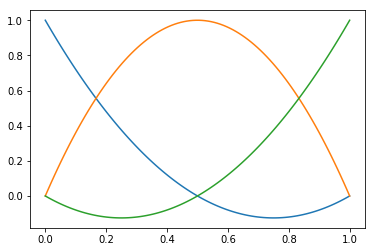

In [17]:
myFEM = FEMBasis(x,3)
plt.plot(x_i,myFEM.lam_psi[0](x_i))
plt.plot(x_i,myFEM.lam_psi[1](x_i))
plt.plot(x_i,myFEM.lam_psi[2](x_i))
plt.show()

Lagrange Elements of order 2

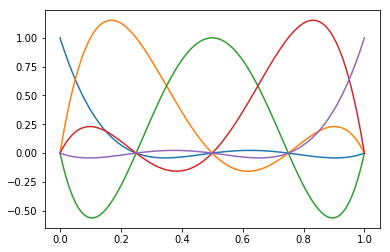

In [24]:
N = 5
myFEM = FEMBasis(x,N)
for i in range(0,N):
    plt.plot(x_i,myFEM.lam_psi[i](x_i))

plt.show()